In [1]:
import pandas as pd
import json
#for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#statistics
import statistics as stat

In [2]:
#plan
#associate genres with each playlist

In [3]:
with open("mpd.slice.0-999.json",'r') as json_file:
    data=json.load(json_file)

In [4]:
#Create library with artists and their genres
#1First stuff(load file)
with open("artists_0-999.json",'r') as json_file:
    df_2=json.load(json_file)
#2
artist_dict={"name":[],"genres":[]}
for ID in df_2:
    artist_dict["name"].append(df_2[ID]["name"])
    artist_dict["genres"].append(df_2[ID]["genres"])
#3
genre={"name":[],"genre":[]}
for ID in df_2:
    if df_2[ID]["genres"]==list:
        genre[df_2[ID]["name"]]=df_2[ID]["genres"]
    else:
        genre[df_2[ID]["name"]]=df_2[ID]["genres"]
    #make list of names in genre dict
    genre["name"].append(df_2[ID]["name"])
#function to find the genres
def getgenres(artist):
    return genre[artist]

In [75]:
#This gives you top 5 most popular

from collections import Counter

def top5items(lst):
    # Count occurrences of each item
    counts = Counter(lst)
    # Get the top 5 most common items
    top_5 = [item for item, _ in counts.most_common(5)]
    return top_5

In [90]:
#This is how you get the list of id and genres

#thislist.count("apple")
def getlistofstuff(playlist):
    templist=[playlist,data["playlists"][playlist]["num_followers"]]
    #test stuff that will be turned into function
    genrelist=[]
    playlist=data["playlists"][playlist]["tracks"]
    
    for taco in range(len(playlist)):
        #find if name in in list of genres so there is no error of no name
        if genre["name"].count(playlist[taco]["artist_name"])>0:
            currentgenres=getgenres(playlist[taco]["artist_name"])#so that there is no nested lists
            #search for lists(incomplete)
            
            for burrito in range(len(currentgenres)):                
                genrelist.append(currentgenres[burrito])
    top5=top5items(genrelist)
    for taco in range(len(top5)):
        templist.append(top5[taco])
    return(templist)

In [91]:
#This is for converting genres into numerical data
from collections import Counter

def replace_with_popularity(lst):
    # Count occurrences of each item except -1
    counts = Counter(item for item in lst if item != -1)
    # Sort items by popularity (frequency)
    sorted_items = sorted(counts, key=lambda x: counts[x], reverse=True)
    # Create a dictionary to map items to popularity numbers
    popularity_map = {item: rank + 1 for rank, item in enumerate(sorted_items)}
    # Replace items with popularity numbers, preserving -1 values
    popularity_numbers = [popularity_map.get(item, -1) for item in lst]
    return popularity_numbers

# Example usage:
your_list = ['a', 'b', 'c', 'a', 'b', 'a', 'd', 'e', 'e', 'e', -1, -1]  # Your list of items with some -1 values
popularity_numbers = replace_with_popularity(your_list)
print("Popularity numbers:", popularity_numbers)


Popularity numbers: [1, 3, 4, 1, 3, 1, 5, 2, 2, 2, -1, -1]


In [92]:
#get stuff for putting in dataframe

folw=[]
id_1=[]
gen1=[]
gen2=[]
gen3=[]
gen4=[]
gen5=[]
lfhdsbfksdnbkf=[]
for taco in range(len(data["playlists"])):
    list_temp=getlistofstuff(taco)
    print(list_temp)
    if len(list_temp)==2:
        id_1.append(list_temp[0])
        folw.append(list_temp[1])
        gen1.append(-1)
        gen2.append(-1)
        gen3.append(-1)
        gen4.append(-1)
        gen5.append(-1)
    elif len(list_temp)==3:
        id_1.append(list_temp[0])
        folw.append(list_temp[1])
        gen1.append(list_temp[2])
        gen2.append(-1)
        gen3.append(-1)
        gen4.append(-1)
        gen5.append(-1)
    elif len(list_temp)==4:
        id_1.append(list_temp[0])
        folw.append(list_temp[1])
        gen1.append(list_temp[2])
        gen2.append(list_temp[3])
        gen3.append(-1)
        gen4.append(-1)
        gen5.append(-1)
    elif len(list_temp)==5:
        id_1.append(list_temp[0])
        folw.append(list_temp[1])
        gen1.append(list_temp[2])
        gen2.append(list_temp[3])
        gen3.append(list_temp[4])
        gen4.append(-1)
        gen5.append(-1)
    elif len(list_temp)==6:
        id_1.append(list_temp[0])
        folw.append(list_temp[1])
        gen1.append(list_temp[2])
        gen2.append(list_temp[3])
        gen3.append(list_temp[4])
        gen4.append(list_temp[5])
        gen5.append(-1)
    elif len(list_temp)==7:
        id_1.append(list_temp[0])
        folw.append(list_temp[1])
        gen1.append(list_temp[2])
        gen2.append(list_temp[3])
        gen3.append(list_temp[4])
        gen4.append(list_temp[5])
        gen5.append(list_temp[6])
    lfhdsbfksdnbkf.append(len(list_temp))


[0, 1, 'pop', 'dance pop', 'r&b', 'urban contemporary', 'post-teen pop']
[1, 1, 'rock', 'album rock', 'classic rock', 'hard rock', 'progressive rock']
[2, 1, 'k-pop', 'k-pop boy group', 'korean r&b', 'k-rap', 'pop']
[3, 1, 'indie rock', 'noise pop', 'indie garage rock', 'pov: indie', 'chamber pop']
[4, 2, 'pop rock', 'permanent wave', 'rock', 'lilith', 'dance pop']
[5, 1, 'pop', 'dance pop', 'pop rap', 'r&b', 'miami hip hop']
[6, 1, 'rock', 'alternative rock', 'pop rock', 'modern rock', 'horror punk']
[7, 1, 'indietronica', 'electropop', 'indie poptimism', 'metropopolis', 'nyc pop']
[8, 2, 'rock', 'modern rock', 'modern alternative rock', 'classic rock', 'alternative rock']
[9, 1, 'country', 'outlaw country', 'classic texas country', 'contemporary country', 'country road']
[10, 2, 'rap', 'trap', 'pop rap', 'southern hip hop', 'hip hop']
[11, 1, 'electronica', 'indietronica', 'trip hop', 'downtempo', 'instrumental hip hop']
[12, 1, 'folk-pop', 'neo mellow', 'rap', 'trap', 'pop']
[13, 1,

[130, 2, 'pop', 'rock', 'modern rock', 'hip hop', 'rap']
[131, 1, 'pop', 'dance pop', 'neo mellow', 'rap', 'hip hop']
[132, 1, 'deathcore', 'melodic metalcore', 'metalcore', 'horror punk', 'new jersey hardcore']
[133, 4, 'pop', 'alt z', 'post-teen pop', 'dance pop', 'indie poptimism']
[134, 1, 'rap', 'pop', 'hip hop', 'pop rap', 'dance pop']
[135, 1, 'rock', 'post-grunge', 'alternative rock', 'alternative metal', 'pop rock']
[136, 1, 'hip hop', 'rap', 'conscious hip hop', 'east coast hip hop', 'pop rap']
[137, 1, 'pop', 'uk dance', 'pop dance', 'uk pop', 'dance pop']
[138, 1, 'indietronica', 'indie rock', 'modern rock', 'chamber pop', 'stomp and holler']
[139, 2, 'escape room', 'hip hop', 'alternative r&b', 'alternative hip hop', 'underground hip hop']
[140, 1, 'stomp and holler', 'chamber pop', 'indie folk', 'indie rock', 'acoustic pop']
[141, 1, 'acoustic pop', 'vapor pop', 'art pop', 'chillwave', 'downtempo']
[142, 1, 'indietronica', 'neo-synthpop', 'alternative dance', 'new rave', 

[253, 4, 'trap', 'pop rap', 'rap', 'southern hip hop', 'hip hop']
[254, 2, 'modern rock', 'rock', 'pop', 'alternative rock', 'indie rock']
[255, 22, 'singer-songwriter', 'ectofolk', 'lilith', 'chamber pop', 'permanent wave']
[256, 1, 'modern rock', 'indietronica', 'modern alternative rock', 'pop', 'indie rock']
[257, 1, 'rap', 'hip hop', 'trap', 'southern hip hop', 'chicago rap']
[258, 4, 'r&b', 'neo soul', 'urban contemporary', 'alternative r&b', 'contemporary r&b']
[259, 1, 'bluegrass', 'banjo', 'bluegrass gospel', 'traditional country', 'traditional folk']
[260, 1, 'contemporary country', 'country road', 'country', 'modern country rock', 'classic oklahoma country']
[261, 1, 'pop', 'pop rap', 'edm', 'pop dance', 'modern rock']
[262, 1, 'pop', 'dance pop', 'post-teen pop', 'canadian pop', 'pop rap']
[263, 1, 'r&b', 'pop rap', 'urban contemporary', 'trap', 'southern hip hop']
[264, 4, 'edm', 'pop dance', 'electro house', 'pop', 'brostep']
[265, 1, 'pop', 'hip hop', 'rap', 'pov: indie',

[371, 1, 'acoustic pop', 'indie anthem-folk', 'indiecoustica', 'modern rock', 'folk-pop']
[372, 1, 'ambient idm', 'canadian house', 'electronica', 'float house', 'future garage']
[373, 2, 'modern rock', 'stomp and holler', 'pop', 'neo mellow', 'folk-pop']
[374, 1, 'rock', 'classic rock', 'mellow gold', 'album rock', 'soft rock']
[375, 1, 'neo mellow', 'pop punk', 'singer-songwriter', 'modern rock', 'neon pop punk']
[376, 1, 'pop', 'rap', 'trap', 'southern hip hop', 'pop rap']
[377, 1, 'classical', 'baroque', 'early music', 'german baroque', 'fictitious orchestra']
[378, 1, 'contemporary country', 'country', 'country road', 'country dawn', 'modern country rock']
[379, 7, 'stomp and holler', 'indie folk', 'chamber pop', 'new americana', 'indie rock']
[380, 3, 'pop', 'dance pop', 'pop rap', 'urban contemporary', 'post-teen pop']
[381, 1, 'pop', 'modern rock', 'rock', 'edm', 'neo mellow']
[382, 2, 'urban contemporary', 'r&b', 'rap', 'freestyle', 'dance pop']
[383, 2, 'contemporary country'

[494, 1, 'pop', 'canadian contemporary r&b', 'folk-pop', 'singer-songwriter', 'neo mellow']
[495, 1, 'rap', 'trap', 'melodic rap', 'hip hop', 'atl hip hop']
[496, 1, 'soft rock', 'soul', 'mellow gold', 'adult standards', 'rock']
[497, 1, 'cumbia', 'classic colombian pop', 'porro', 'musica popular colombiana', 'cumbia funk']
[498, 1, 'rock', 'alternative rock', 'modern rock', 'garage rock', 'modern blues rock']
[499, 1, 'pop', 'dance pop', 'contemporary country', 'country', 'country road']
[500, 1, 'rock', 'album rock', 'hard rock', 'classic rock', 'soft rock']
[501, 1, 'latin hip hop', 'urbano latino', 'reggaeton', 'trap latino', 'cubaton']
[502, 1, 'pop', 'broadway', 'dance pop', 'show tunes', 'post-teen pop']
[503, 2, 'compositional ambient', 'soundtrack', 'orchestral soundtrack', 'post-minimalism', 'latin soundtrack']
[504, 1, 'soul', 'funk', 'quiet storm', 'motown', 'disco']
[505, 1, 'modern rock', 'rock', 'indietronica', 'indie rock', 'lgbtq+ hip hop']
[506, 1, 'latin pop', 'urban

[618, 1, 'a cappella', 'jazz trio', 'christian a cappella', 'gospel', 'baroque']
[619, 1, 'modern rock', 'indietronica', 'modern alternative rock', 'rock', 'pov: indie']
[620, 1, 'rap', 'trap', 'pop rap', 'pop', 'viral trap']
[621, 1, 'rap', 'hip hop', 'trap', 'southern hip hop', 'pop rap']
[622, 1, 'pop', 'cantopop', 'j-pop', 'j-rock', 'dance pop']
[623, 2, 'rock', 'album rock', 'classic rock', 'hard rock', 'soft rock']
[624, 1]
[625, 1, 'rock', 'modern rock', 'alternative rock', 'classic rock', 'permanent wave']
[626, 3, 'canadian contemporary r&b', 'singer-songwriter pop', 'pop', 'rap', 'chill r&b']
[627, 1, 'indietronica', 'modern rock', 'rock', 'neo-synthpop', 'indie rock']
[628, 1, 'pop', 'dance pop', 'contemporary country', 'country', 'classic rock']
[629, 1, 'album rock', 'classic rock', 'soft rock', 'rock', 'hard rock']
[630, 1, 'modern rock', 'modern alternative rock', 'pov: indie', 'shimmer pop', 'indietronica']
[631, 1, 'edm', 'pop dance', 'progressive electro house', 'elec

[731, 1, 'indietronica', 'neo-synthpop', 'nu disco', 'stomp and holler', 'modern rock']
[732, 1, 'contemporary country', 'country', 'country road', 'modern country rock', 'country pop']
[733, 3, 'trap', 'rap', 'southern hip hop', 'pop rap', 'hip hop']
[734, 1, 'urban contemporary', 'dance pop', 'r&b', 'pop rap', 'rap']
[735, 1, 'pop', 'rock', 'soft rock', 'modern rock', 'show tunes']
[736, 1, 'rap', 'hip hop', 'pop rap', 'atl hip hop', 'dance pop']
[737, 1, 'urbano latino', 'reggaeton', 'trap latino', 'reggaeton colombiano', 'latin pop']
[738, 1, 'reggaeton', 'latin alternative', 'rock en espanol', 'latin afrobeat', 'latin hip hop']
[739, 3, 'edm', 'electro house', 'brostep', 'nu disco', 'livetronica']
[740, 3, 'rock', 'hard rock', 'classic rock', 'album rock', 'heartland rock']
[741, 2, 'rock', 'permanent wave', 'art pop', 'indietronica', 'alternative rock']
[742, 1, 'a cappella', 'viral pop', 'pop', 'easy listening', 'pops orchestra']
[743, 1, 'rap', 'hip hop', 'trap', 'southern hip 

[846, 1, 'pop', 'art pop', 'alt z', 'emo rap']
[847, 1, 'modern rock', 'stomp and holler', 'indie folk', 'indietronica', 'neo mellow']
[848, 2, 'jawaiian', 'reggae rock', 'reggae fusion', 'reggae', 'nz reggae']
[849, 3, 'reggae rock', 'reggae fusion', 'hip hop', 'rap', 'rock']
[850, 1, 'rap', 'trap', 'pop rap', 'southern hip hop', 'hip hop']
[851, 1, 'indie rock', 'chamber pop', 'indietronica', 'seattle indie', 'modern rock']
[852, 1, 'modern rock', 'hip hop', 'rap', 'modern alternative rock', 'stomp and holler']
[853, 2, 'canadian soundtrack', 'soundtrack', 'movie tunes', 'show tunes', 'hollywood']
[854, 3, 'urban contemporary', 'r&b', 'dance pop', 'contemporary r&b', 'hip pop']
[855, 4, 'gospel', 'praise', 'gospel r&b', 'naija worship', 'deep ccm']
[856, 1, 'pop', 'dance pop', 'viral pop', 'pop rap', 'social media pop']
[857, 2, 'rock', 'soft rock', 'classic rock', 'mellow gold', 'movie tunes']
[858, 1, 'pop', 'dance pop', 'rap', 'trap', 'pop rap']
[859, 1, 'neo mellow', 'modern rock

[970, 1, 'shimmer pop', 'modern alternative rock', 'modern rock', 'indietronica', 'pop']
[971, 1, 'rap', 'trap', 'melodic rap', 'hip hop', 'pop rap']
[972, 1, 'r&b', 'urban contemporary', 'contemporary r&b', 'dance pop', 'pop']
[973, 1, 'pop', 'rap', 'hip hop', 'indie soul', 'pop r&b']
[974, 1, 'edm', 'pop dance', 'electro house', 'pop', 'dance pop']
[975, 1, 'rap', 'r&b', 'hip hop', 'pop rap', 'trap']
[976, 1, 'neo soul', 'contemporary r&b', 'r&b', 'urban contemporary', 'british soul']
[977, 1, 'pop', 'edm', 'pop dance', 'dance pop', 'rap']
[978, 1, 'dancehall', 'reggae fusion', 'jamaican dancehall', 'soca', 'chutney']
[979, 1, 'contemporary country', 'country road', 'country', 'pop', 'modern country rock']
[980, 3, 'rap', 'trap', 'pop rap', 'hip hop', 'southern hip hop']
[981, 1, 'neo mellow', 'acoustic pop', 'viral pop', 'piano rock', 'pop']
[982, 1, 'rap', 'trap', 'southern hip hop', 'contemporary r&b', 'r&b']
[983, 1, 'gangster rap', 'hip hop', 'west coast rap', 'g funk', 'rap']
[

In [146]:
from collections import Counter

def map_values_based_on_frequency(lists):
    # Flatten the lists into one single list
    flat_list = [item for sublist in lists for item in sublist if item != -1]
    
    # Count the frequency of each string value
    frequencies = Counter(flat_list)
    
    # Sort the values by frequency in descending order
    sorted_values = sorted(frequencies, key=frequencies.get, reverse=True)
    
    # Create a mapping of string values to numerical values based on frequency
    value_mapping = {value: i + 1 for i, value in enumerate(sorted_values)}
    
    return value_mapping

def transform_lists(lists, value_mapping):
    transformed_lists = []
    for l in lists:
        transformed_list = [value_mapping[item] if item in value_mapping else item for item in l]
        transformed_lists.append(transformed_list)
    return transformed_lists

# Example lists
lists = [gen1,gen2,gen3,gen4,gen5]

# Get value mapping based on frequency
value_mapping = map_values_based_on_frequency(lists)

# Transform the lists using the value mapping
transformed_lists = transform_lists(lists, value_mapping)

# Print the transformed lists
for l in transformed_lists:
    print(l)


[1, 3, 128, 21, 33, 1, 3, 16, 3, 12, 2, 109, 54, 1, 39, 48, 21, 1, 1, 23, 8, 13, 1, 26, 7, 9, 23, 141, 2, 1, 21, 1, 3, 30, 1, 1, 21, 2, 1, 14, 1, 14, 1, 14, 1, 3, 49, 27, 14, 98, 14, 1, 40, 2, 30, 12, 94, 7, 287, 1, 6, 14, 2, 13, 1, 3, 15, 288, 2, 46, 21, 1, 60, 1, 49, 204, 1, 3, 142, 67, 289, 2, 98, 12, 6, 1, 83, 7, 128, 24, 129, 10, 143, 1, 1, 2, 36, 21, 18, 30, 50, 84, 2, 60, 1, 5, 290, 1, 110, 49, 205, 14, 16, 2, 12, 14, 6, 111, 15, 33, 291, 26, 13, 1, 4, 206, 3, 1, 14, 3, 1, 1, 292, 1, 2, 3, 6, 1, 16, 165, 23, 55, 16, 2, 207, 3, 1, 166, 7, 78, 1, 79, 1, 1, 1, 23, 10, 13, 7, 1, 1, 1, 144, 3, 2, 14, 18, 1, 3, 67, 6, 1, 1, 10, 13, 52, 1, 6, 2, 1, 1, 53, 1, 44, 7, 1, 1, 1, 37, 293, 6, 45, 2, 8, 1, 49, 23, 31, 294, 21, 5, 1, 10, 1, 18, 1, 1, 2, 12, 1, 40, 2, 60, 141, 1, 1, 167, 14, 2, 168, 68, 18, 24, 13, 1, 1, 204, 2, 24, 145, 142, 44, 1, 1, 2, 44, 33, 3, 128, 2, 6, 41, 1, 3, 17, 3, 1, 1, 12, 21, 1, 169, 12, 8, 7, 37, 7, 2, 10, 295, 14, 1, 1, 10, 9, 1, 13, 1, 1, 208, 112, 1, 1, 89, 3,

In [ ]:
replace_with_popularity(your_list)

In [116]:
#Make dataframe
templibrary={}
templibrary["id"]=id_1
#templibrary["follow"]=folw
templibrary["genre1"]=replace_with_popularity(gen1)
templibrary["genre2"]=replace_with_popularity(gen2)
templibrary["genre3"]=replace_with_popularity(gen3)
templibrary["genre4"]=replace_with_popularity(gen4)
templibrary["genre5"]=replace_with_popularity(gen5)
pivotDF=pd.DataFrame(templibrary)#(not actually pivoted, just so that I dont have to change the code)

In [ ]:
#actual stuff

In [117]:
from sklearn.cluster import MiniBatchKMeans

In [118]:
kb = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=6)

In [119]:
kb = kb.fit(pivotDF)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [120]:
kb.cluster_centers_

array([[767.24561404,  21.03508772,  33.12280702,  37.98245614,
         57.10526316,  81.73684211],
       [221.19298246,  23.98245614,  32.40350877,  47.26315789,
         44.94736842,  46.89473684]])

In [121]:
from sklearn.metrics import silhouette_score

In [122]:
ss = silhouette_score(pivotDF, kb.labels_)

In [123]:
ss

0.5079349008495389

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Prog

<AxesSubplot:xlabel='k', ylabel='Score'>

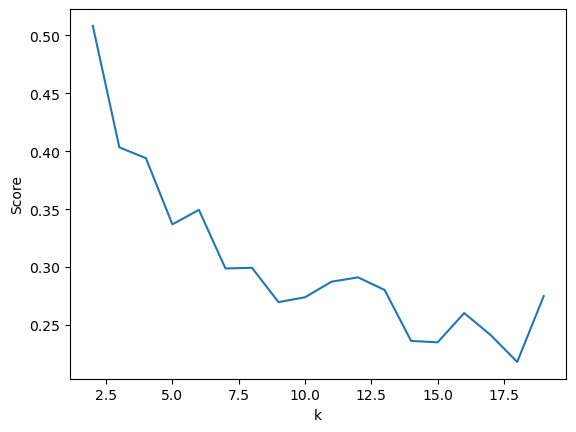

In [133]:
scores = {"k":[],"Score":[]}
for i in range(1, 20):
    kb = MiniBatchKMeans(n_clusters=i, random_state=0, batch_size=100)
    kb = kb.fit(pivotDF)
    if(len(set(kb.labels_)) > 1):
        ss = silhouette_score(pivotDF, kb.labels_)
        scores["k"].append(i)
        scores["Score"].append(ss)
scores_df=pd.DataFrame(scores)
import seaborn as sns
sns.lineplot(data=scores_df,x="k",y="Score")

In [130]:
scores_df["k"][1]

3

In [ ]:
scores

In [134]:
kb = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=100)
kb = kb.fit(pivotDF)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 5120 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [135]:
pivotDF['Cluster'] = kb.labels_

In [136]:
pivotDF.head(10)

,id,genre1,genre2,genre3,genre4,genre5,Cluster
0,0,1,2,27,24,44,0
1,1,3,26,17,12,125,0
2,2,32,93,118,112,3,0
3,3,17,55,119,21,62,0
4,4,28,20,4,58,4,0
5,5,1,2,1,11,126,0
6,6,3,21,53,8,127,0
7,7,10,56,73,50,84,0
8,8,3,3,24,14,30,0
9,9,11,66,74,43,35,0


In [139]:
with open("Vetting_Playlist.json",'r') as json_file:
    teacherdata=json.load(json_file)

In [ ]:
teacher

In [ ]:
#function to find the genres(notused)
def getplayistgenres(playlists_df,playlist):
    playlist=data["playlists"][playlist]
    
    
    
    
    
    return foundgenres

In [11]:
from collections import Counter

def top_5_most_common_items_with_count(lst):
    # Count occurrences of each item
    counts = Counter(lst)
    # Get the top 5 most common items
    top_5 = counts.most_common(5)
    return top_5


In [70]:
min(lfhdsbfksdnbkf)

1

In [ ]:
playlist

In [ ]:

data["playlists"][1]
playcorrect={}
for playlist in range(len(data["playlists"])):
    #playcorrect[playlist], create temporary library so that I can put some data in it
    lib={"artist":[],"genre":[]}
    for songinplaylist in range(len(data["playlists"][playlist]["tracks"])):
        #Artist name:data["playlists"][playlist]["tracks"][songinplaylist]["artist_name"]
        name=data["playlists"][playlist]["tracks"][songinplaylist]["artist_name"]#get the artist's name so that you can get the genres and put them in
        #check if the name is in the list, and if so you add to the list of genres, either way you add the name to the artistlist:
        if name in genre:
            lib["genre"].append(genre[name])
        lib["artist"].append(name)
    #find the most likely top genres
    unique=lib["genre"].unique()
    
#print(artistslist)
#print(artistslist)
        #artistlist.append(data["playlists"][playlist]["tracks"][songinplaylist]["artist_name"])

In [ ]:
data["playlists"][0]["tracks"][0]["artist_name"]

In [ ]:
with open("songs_0-999.json",'r') as json_file:
    jsongs=json.load(json_file)


In [ ]:
#for taco in jsongs:
#    print(taco)
#jsongs["0UaMYEvWZi0ZqiDOoHU3YI"]

In [ ]:
x=[]
#df_playlist=pd.DataFrame(data)
#you get a list of all of the artists(x) in order
for playlist in range(len(data["playlists"])):
    for song in range(len(data["playlists"][playlist]["tracks"])):
        x.append(data["playlists"][playlist]["tracks"][song]["artist_name"])
#jsongs["0UaMYEvWZi0ZqiDOoHU3YI"]

In [ ]:
#data["playlists"][0]["tracks"][0]["artist_name"]

In [ ]:
#Not official stuff, just for looking
y=[]
for taco in range(len(data["playlists"])):
    y.append(len(data["playlists"][taco]["tracks"]))
df=pd.DataFrame({"x":range(1,len(y)+1),"y":sorted(y)})#sorted(y)

sns.lineplot(data=df,x='x',y='y')
plt.xlabel("x")
plt.ylabel("y")
stat.mean(y)
print(min(y))

In [ ]:
#len(data["playlists"][taco]["tracks"])

In [ ]:
#make variable called artist so that you can then make a dataframe that has songs and the genre
#for taco in range(len(data["playlists"])):
#    for burrito in range(len(data["playlists"][taco]["tracks"])):
#        artist=data["playlists"][taco]["tracks"][burrito]["artist_name"]

In [ ]:
#x=data["playlists"][0]["tracks"]
#x
#for hotdog in range(len(x)):
#    data["playlists"][0]["tracks"][hotdog]["artist_name"]
#
#[0]["artist_name"]

In [ ]:
#example library
library={
    "playlist1":[["Song","Artist",["Pop","rock"]],["Song","Artist",["Pop","rock"]]] 
}

In [ ]:
data_art

In [ ]:
pip show pandas